# Tasks 2020 
### [ Fundamentals of Data Analysis Module GMIT 2020 ]

<img align="left" width="300" src="https://www.wardyit.com/wp-content/uploads/data-analysis-fundamentals-using-excel.png">

Below are my solutions to the Task assessment.

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

<br>

***

## Table of Contents
* [Task 1: Dictionary of unique items with the number of appearance from a list.](#task1)
* [Task 2: Dice roll simulation](#task2)
* [Task 3: Flip a coin simulation ](#task3)
* [Task 4: Simpson’s paradox](#task4)
***

<br>

### __TASK 1__: *Dictionary of unique items with the number of appearance from a list.*  <a name="task1"></a>

For completion of this task I will iterate over the list checking on unique items as keys and then count and store the corresponding number of times each item appears as values in the dictionary. [1]

> [1] https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

In [1]:
def counts(l):
    """
    Function that takes a list as an input and returns a dictionary of unique items with the number of appearance
    """
    # Creating an empty dictionary
    dic = {}
    # Loop through items in the list
    for i in l:
        # Checking if items are in the dictionary
        if i in dic:
            # Count the number of times each item appears
            dic[i] += 1
        else:
            dic[i] = 1
    # Output the dictionary
    return dic

<br>


##### Test of the function <a name="Test_of_the_function1"></a>
Here is a test of the above function with the proposed in the task list ['A', 'A', 'B', 'C', 'A']

In [2]:
counts(['A', 'A', 'B', 'C', 'A'])

{'A': 3, 'B': 1, 'C': 1}

***

<br>

### __TASK 2__: *Dice roll simulation*  <a name="task2"></a>

<img align="left" width="230" src="https://i.pinimg.com/originals/cd/18/f1/cd18f1c40c148545b66e9f6a851c98d2.jpg">

In order to simulate a randomly rolling $k$ dice $n$ number of times I will be using a function from $python.random$ called $randint$ that returns a random integer within a given range (in this cases dice sides) [1]. Alongside with randint I will be using the $sum$ function within the range of given parameter $k$. [2]

To keep track of each total face value I will incorporate a function $counts$ from Task 1.

> [1] [Python: random.randint](https://docs.python.org/3/library/random.html)
<br>
[2] [Stackoverflow: How to sum up values of a for range function in python](https://stackoverflow.com/questions/43528962/how-to-sum-up-values-of-a-for-range-function-in-python)

<br>

#### General setup

In [3]:
# For generating random numbers
import random 
# Package for plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

In [4]:
# Colour scheme and styles for plots.
sns.set_theme(palette="Paired", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (13, 9)

<br>

#### Dice simulation function 

In [5]:
def dicerolls(k, n):
    """
    Function that simulates randomly rolling k dice n times
    and keeps track of each total face value
    """
    # Initialize the list of rolls
    rolls = []
    # Loop through the number of times the dice is rolled
    for i in range(n):
        # Choose randomly a number between 1 and 6, inclusively, within k range:
        dice = sum(random.randint(1, 6) for j in range(k))
        # Add to list of rolls
        rolls.append(dice)
    # Sort the list in ascending order. 
    rolls = sorted(rolls)
    # Call a function counts from task 1
    output = counts(rolls)
    return output

<br>

#### Test of the function <a name="Test_of_the_function2"></a>
Here is a test of the above function where k number of dices is rolled n number of times

In [6]:
dicerolls(2,1000)

{2: 22,
 3: 54,
 4: 80,
 5: 128,
 6: 137,
 7: 150,
 8: 146,
 9: 107,
 10: 94,
 11: 59,
 12: 23}

<br>

#### Plot the output by rolling a diffent number of dice. 

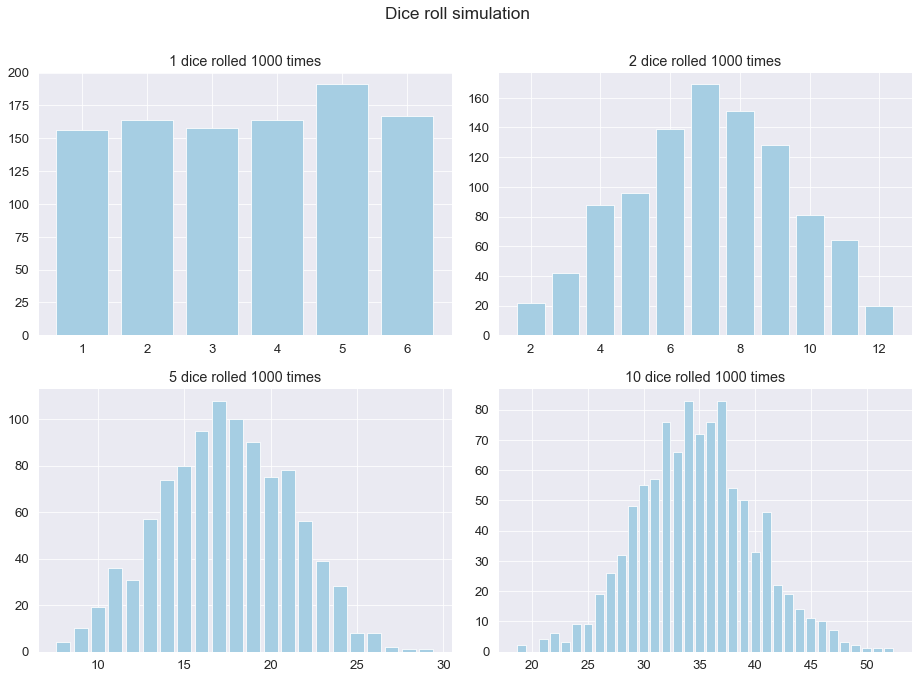

In [7]:
# Build 2x2 plots.
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, sharey=False)
fig.suptitle("Dice roll simulation ", y=1.05)

# Fucntion for building a plot. 
def dice_plot(k, n, ax):
    d = dicerolls(k, n)
    ax.bar(d.keys(), d.values())
    ax.set_title(f"{k} dice rolled {n} times")

# Roll k Dice n times on separate axis
dice_plot(1, 1000, ax1)
dice_plot(2, 1000, ax2)
dice_plot(5, 1000, ax3)
dice_plot(10, 1000, ax4)

# Clean up whitespace padding.
fig.tight_layout()

# Display plot.
plt.show()

<br>

#### Conclusion on the above plots

It can be seen that the graphs approach a normal distribution as the number of dice rolled is increased.

***

<br>

### __TASK 3__: *Flip a coin simulation*  <a name="task3"></a>

<br>

<img align="left" width="200" src="https://www.flaticon.com/svg/static/icons/svg/1715/1715539.svg">

<br>

For simulation of a flipping a coin 100 times with a 50/50 chance of heads or tails I will be using a function [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) from [NumPy](https://numpy.org/) library. This function draws samples from a binomial distribution that has two possible outcomes: "success" or "failure", or in this case "heads" or "tails". [1]

The function takes three parameters:
* _n_ - a number of times coin is flipped,
* _p_ - probability of getting heads or tails,
* _size_ - a number of times we run the test. 

> [1] [Statistics How To: Binomial Distribution](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/)

<br>

#### General setup

In [8]:
# Numpy to use numpy.random.binomial function
import numpy as np

<br>

#### Flipping a coin simulation. 

In [9]:
# Flip a coin 100 times with a probability 0.5 of each trial tested 1000 times. 
n, p, size = 100, 0.5, 1000

# Draw the samples.
x = np.random.binomial(n, p, size)

# Display the number of heads.
x

array([47, 45, 46, 42, 51, 50, 44, 50, 49, 49, 52, 52, 57, 46, 48, 37, 48,
       60, 44, 48, 52, 48, 39, 59, 44, 48, 46, 52, 53, 54, 45, 40, 54, 57,
       48, 45, 46, 43, 52, 46, 48, 51, 44, 43, 45, 50, 59, 45, 53, 50, 52,
       48, 47, 62, 49, 48, 44, 43, 54, 51, 49, 51, 41, 45, 55, 46, 55, 43,
       52, 45, 49, 52, 56, 48, 55, 54, 50, 50, 52, 49, 45, 48, 51, 46, 55,
       44, 45, 48, 51, 49, 50, 47, 49, 49, 39, 56, 49, 51, 52, 47, 49, 59,
       50, 48, 53, 53, 46, 49, 49, 56, 51, 48, 41, 37, 52, 55, 45, 44, 42,
       50, 46, 58, 43, 44, 47, 52, 51, 53, 58, 52, 59, 51, 52, 35, 50, 56,
       46, 50, 52, 51, 56, 50, 47, 48, 46, 50, 47, 47, 50, 57, 55, 38, 51,
       50, 46, 52, 49, 47, 56, 58, 56, 54, 55, 50, 38, 50, 54, 51, 53, 47,
       55, 42, 50, 50, 44, 41, 43, 54, 46, 49, 53, 51, 48, 42, 52, 46, 56,
       57, 49, 41, 49, 53, 46, 44, 54, 41, 52, 50, 51, 47, 53, 52, 56, 64,
       54, 52, 51, 48, 54, 48, 47, 55, 41, 50, 54, 48, 47, 39, 55, 40, 52,
       43, 52, 52, 52, 51

<br>

#### Plot the output of flipping a coin 100 times.

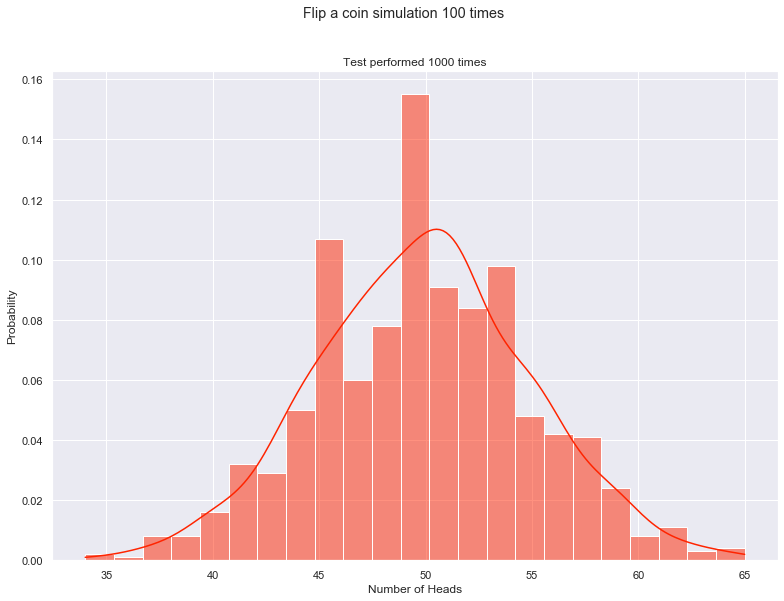

In [10]:
# Colour scheme for the plot.
sns.set_theme(palette="autumn")

# Plot the array.
fig, ax = plt.subplots()
fig.suptitle("Flip a coin simulation 100 times")

sns.histplot(x, stat="probability", kde=True, ax=ax).set_title("Test performed 1000 times")
ax.set_xlabel("Number of Heads")

# Show the plot.
plt.show()

<br>

#### Conclusion on the above plot

The plot of flip a coin simulator roughly follows a bell-shaped curve.

***

<br>

### __TASK 4__: *Simpson’s paradox*  <a name="task4"></a>

<br>

<img align="left" width="300" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_UqgTLM_0HWkxxSuAAGnlwkGLV_jth9I6Mg&usqp=CAU">

<br>

__Simpson's paradox__ (or _Yule-Simpson effect_ ), in statistics, is a phenomenon where one particular trend shown in groups of data is reversed when the groups are combined together. In order to interpret data, correctly understanding and identifying this paradox is of critical importance. [1]

To demostrate the work of Simpson's paradox, I will build a linear regression model and then look at the Covariance between two variables, __x__ and __y__, in four data sets. [2] I will use [NumPy](https://numpy.org/) library to create an array of __x__ values and a notation __y = a * x + b__ for corresponding __y__ array of values. After that I will merge them into one large data set to show the reversed trend. [3]

> [1] [BRILLIANT: Simpson's Paradox](https://brilliant.org/wiki/simpsons-paradox/)
<br>
[2] [Degenerate State: Generating Examples of Simpson's Paradox](http://www.degeneratestate.org/posts/2017/Oct/22/generating-examples-of-simpsons-paradox/)
<br>
[3] [Pandas: Merge, join, concatenate and compare](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

<br>

#### General setup

In [11]:
# Dataframes.
import pandas as pd

<br>

#### Simulate Data sets.

In [12]:
# Create my 4 data sets.
# Set 1
x1 = np.linspace(-6, 7, 30)
y1 = 1 * x1 + 15
set1 = pd.DataFrame({"x": x1, "y": y1,  "dataset": 1})

# Set 2
x2 = np.linspace(5, 10, 100)
y2 = 1 * x2 + 4
set2 = pd.DataFrame({"x": x2, "y": y2,  "dataset": 2})

# Set 3
x3 = np.linspace(-3, 6, 50)
y3 = 2 * x3 + 12
set3 = pd.DataFrame({"x": x3, "y": y3, "dataset": 3})

# Set 4
x4 = np.linspace(-6, 2, 100)
y4 = 1 * x4 + 20
set4 = pd.DataFrame({"x": x4, "y": y4, "dataset": 4})

# Combine all datasets into one big. 
combined = pd.concat([set1, set2, set3, set4], axis=0)

# Show the data set.
combined

,x,y,dataset
0,-6.000000,9.000000,1
1,-5.551724,9.448276,1
2,-5.103448,9.896552,1
3,-4.655172,10.344828,1
4,-4.206897,10.793103,1
...,...,...,...
95,1.676768,21.676768,4
96,1.757576,21.757576,4
97,1.838384,21.838384,4
98,1.919192,21.919192,4


<br>

#### Compute and compare covarience of each data set and combined data. 

In [13]:
print("Covariance of the dataset 1: {:.3f}".format(set1[["x", "y"]].cov().iloc[0,1]))
print("Covariance of the dataset 2: {:.3f}".format(set2[["x", "y"]].cov().iloc[0,1]))
print("Covariance of the dataset 3: {:.3f}".format(set3[["x", "y"]].cov().iloc[0,1]))
print("Covariance of the dataset 4: {:.3f}".format(set4[["x", "y"]].cov().iloc[0,1]))
print("Total Covariance: {:.3f}".format(combined[["x", "y"]].cov().iloc[0,1]))

Covariance of the dataset 1: 15.574
Covariance of the dataset 2: 2.147
Covariance of the dataset 3: 14.338
Covariance of the dataset 4: 5.496
Total Covariance: -4.397


The above calculations depict a negative correlation between x and y in the combined data set. However, for separate data sets the correlation is positive.

<br>

#### Plot the trends.
> [4] [StackOverflow: How to set some xlim and ylim in Seaborn lmplot facetgrid](https://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid)

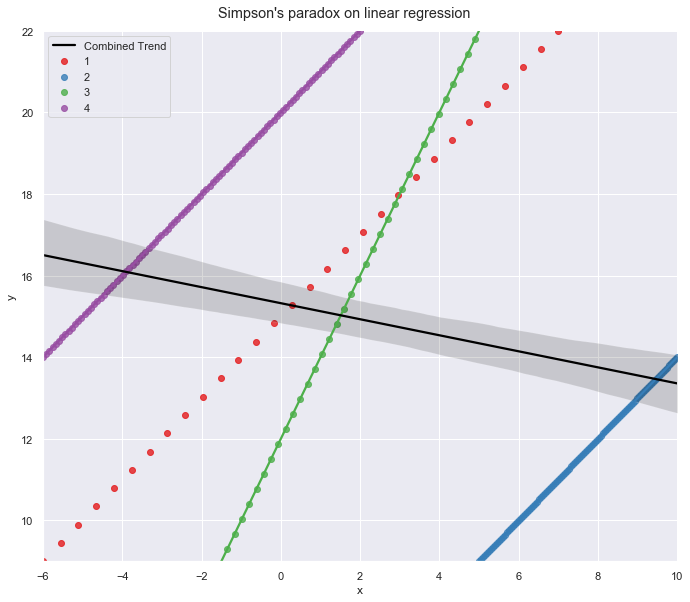

In [14]:
# Build the plots.
# Each dataset.
g = sns.lmplot(x='x',y='y', data=combined, hue='dataset', ci=None, height = 8, aspect= 1.2, palette="Set1", legend=False)

# Combined trend.
sns.regplot(data=combined, x="x", y="y", color="black", scatter=False, label='Combined Trend')

# Set a title.
g.fig.suptitle("Simpson's paradox on linear regression", y=1.02)

# Set limits for the plot.
g.set(xlim=(-6, 10))
g.set(ylim=(9, 22))

# Show the plot with locked legend.
plt.legend(loc='upper left')
plt.show()

<br>

#### Conclusion.

The above plot visually confirms the covariance calculations of reversed trend in the combined data set, thus demonstrating Simpson's Paradox. 

***
<br>

## End.